In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('Cab_Rides.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [15]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [28]:
df.shape

(1155, 7)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  1155 non-null   datetime64[ns]
 1   end_date    1155 non-null   datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1155 non-null   float64       
 6   purpose     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [71]:
df[df.duplicated()]


,start_date,start_time,end_time,duration,category,start,stop,miles,purpose
492,2016-06-28,00:00:00,23:59:00,00:25:00,Business,Durham,Cary,9.9,Meeting


In [3]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

In [4]:
# column names converted to lower

df.columns = df.columns.str.lower()

In [5]:
df["end_date"]= pd.to_datetime(df["end_date"]) 
df["start_date"]= pd.to_datetime(df["start_date"]) 


In [45]:
df.isna().any()

start_date    False
end_date      False
category      False
start         False
stop          False
miles         False
purpose        True
dtype: bool

In [ ]:
# goal
1- which year, month, weekdays,days max miles
2- which category makes most miles
3- fav start and stop points
4- correlation among features
5- which time most cabs are taken(segregate time in morning,evening etc)

# Data Cleaning

## Remove '*' from colnames

In [39]:
df.purpose.isna().sum()

502

In [40]:
(df.purpose.isna().sum()/df.purpose.shape[0])*100
# 43.4% data se null

43.46320346320346

In [14]:
df.purpose.value_counts(dropna = False)

Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: purpose, dtype: int64

In [6]:
# replace nan values in purpose with 'other'
df['purpose'].fillna('Other', inplace = True)

In [52]:
df.loc[df['purpose'].isna(), ['category']]
df.groupby(['purpose', 'category'], sort = False).miles.count().to_frame()

,,miles
purpose,category,
Meal/Entertain,Business,160
Errand/Supplies,Business,128
Meeting,Business,187
Customer Visit,Business,101
Temporary Site,Business,50
Between Offices,Business,18
Charity ($),Personal,1
Commute,Personal,1
Moving,Personal,4


In [7]:
# Separate time from date
df['start_time'] = pd.to_datetime(df['start_date']).dt.time
df['end_time'] = pd.to_datetime(df['end_date']).dt.time
df['duration'] = df['end_date'] - df['start_date']
df['start_date'] = df['start_date'].dt.date

In [8]:
df.drop('end_date', axis = 1, inplace = True)

In [9]:
cols = list(df.columns)
df = df[[cols[0]] + cols[6:] + cols[1:6]]

In [10]:
df.head()

,start_date,start_time,end_time,duration,category,start,stop,miles,purpose
0,2016-01-01,21:11:00,21:17:00,00:06:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,01:37:00,00:12:00,Business,Fort Pierce,Fort Pierce,5.0,Other
2,2016-01-02,20:25:00,20:38:00,00:13:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,17:45:00,00:14:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,15:49:00,01:07:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Purpose v/s No of Rides

In [56]:
ride_purpose = df.purpose.value_counts().index.tolist()
ride_purpose
purpose_count = df.purpose.value_counts().tolist()
ride_info = list(zip(ride_purpose, purpose_count))
ride_info = pd.DataFrame(ride_info, columns = ['purpose', 'count'])
ride_info

,purpose,count
0,Other,502
1,Meeting,187
2,Meal/Entertain,160
3,Errand/Supplies,128
4,Customer Visit,101
5,Temporary Site,50
6,Between Offices,18
7,Moving,4
8,Airport/Travel,3
9,Charity ($),1


[Text(0, 0.5, 'Purpose'), Text(0.5, 0, 'No of Rides')]

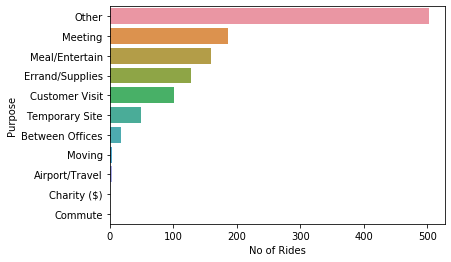

In [61]:
ax = sns.barplot(x ='count' , y = 'purpose', data = ride_info)
ax.set(xlabel = 'No of Rides', ylabel = 'Purpose')


### Purpose v/sMiles v/s Category

In [126]:
pur_cat_miles = df.groupby(['purpose', 'category']).miles.count().to_frame();pur_cat_miles # grouping in category and purpose with miles

miles = pur_cat_miles.miles.values # miles 
purpose = pur_cat_miles.unstack().index.to_list();purpose # getting purpose in list
multi_index = pur_cat_miles.swaplevel().index.to_frame() # multiindexing and swaping to get catgeory col
category = multi_index.category.values.tolist() # getting category from mulitiindex
info = list(zip(miles, purpose,category ))
info
pur_cat_info = pd.DataFrame(info , columns = ['miles','purpose', 'category']);pur_cat_info

,miles,purpose,category
0,3,Airport/Travel,Business
1,18,Between Offices,Business
2,1,Charity ($),Personal
3,1,Commute,Personal
4,101,Customer Visit,Business
5,128,Errand/Supplies,Business
6,160,Meal/Entertain,Business
7,187,Meeting,Business
8,4,Moving,Personal
9,431,Other,Business


[Text(0, 0.5, 'Miles'), Text(0.5, 0, 'Purpose')]

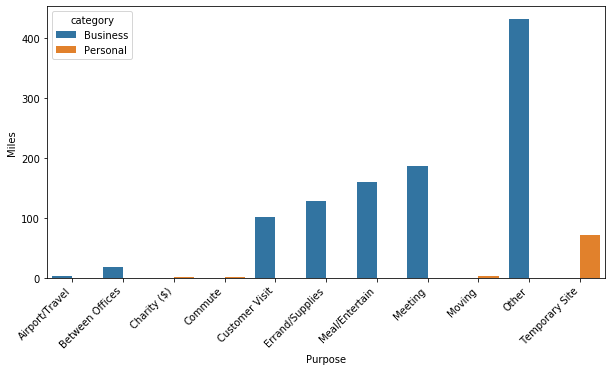

In [138]:
plt.figure(figsize=(10,5))
ax =  sns.barplot(x = 'purpose', y = 'miles', hue = 'category', data = pur_cat_info)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set(xlabel = 'Purpose', ylabel = 'Miles')

In [139]:
 df.head()

,start_date,start_time,end_time,duration,category,start,stop,miles,purpose
0,2016-01-01,21:11:00,21:17:00,00:06:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,01:37:00,00:12:00,Business,Fort Pierce,Fort Pierce,5.0,Other
2,2016-01-02,20:25:00,20:38:00,00:13:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,17:45:00,00:14:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,15:49:00,01:07:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [142]:
# 5.36hrs , 310 miles
df.max()

start_date         2016-12-31
start_time           23:55:00
end_time             23:59:00
duration      0 days 05:36:00
category             Personal
start           Winston Salem
stop            Winston Salem
miles                   310.3
purpose        Temporary Site
dtype: object

In [143]:
df.miles.max()

310.3

In [147]:
df.groupby('start_date').miles.sum()

start_date
2016-01-01     5.1
2016-01-02     9.8
2016-01-05     4.7
2016-01-06    75.1
2016-01-07     0.8
              ... 
2016-12-27    27.0
2016-12-28    44.5
2016-12-29    74.9
2016-12-30    15.7
2016-12-31    75.4
Name: miles, Length: 294, dtype: float64

In [183]:
rides_per_month = df.groupby('start_date').miles.sum().to_frame();rides_per_month

,miles
start_date,
2016-01-01,5.1
2016-01-02,9.8
2016-01-05,4.7
2016-01-06,75.1
2016-01-07,0.8
...,...
2016-12-27,27.0
2016-12-28,44.5
2016-12-29,74.9


In [188]:
rides_per_month['month'] = pd.to_datetime(rides_per_month.index.tolist(), errors = 'coerce')
rides_per_month['month'] = rides_per_month['month'].dt.to_period('M')
rides_per_month = rides_per_month.sort_values(by = 'month', ascending = False)

In [190]:
total_miles_per_month = rides_per_month.groupby('month').sum()

In [197]:
total_miles_per_month.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2016-01 to 2016-12
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   miles   12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [209]:
total_miles_per_month['month'] = total_miles_per_month.index.tolist()
total_miles_per_month['month'] = total_miles_per_month['month'].astype(str)

In [210]:
sns.barplot(x = 'month', y = 'miles', data = total_miles_per_month)

DateParseError: Unknown datetime string format, unable to parse: month

In [207]:
total_miles_per_month.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2016-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   miles   12 non-null     float64
 1   month   12 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [55]:
colnames = []
for col in colnames:
    if df[col].dtype==object:
        df[col]= label_encoder.fit_transform(df[col])


NameError: name 'colnames' is not defined

In [ ]:
# bucketing morning, night, evening